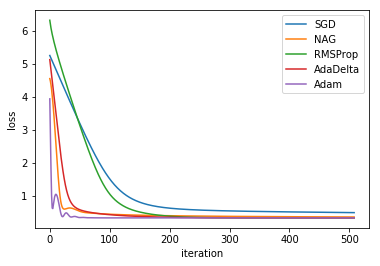

In [3]:
# -*- coding: utf-8 -*-
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 /(1 + np.exp(-z))

def loss(weight,X,y):
    z = np.matmul(X, weight)
    loss_ = -np.mean(y * np.log(sigmoid(z)) + (1 - y) * np.log(1 - sigmoid(z)))
    return loss_

def grad(weight,X,y):
    z = np.matmul(X, weight)
    h = sigmoid(z)
    error = h - y
    gradient = np.matmul(X.transpose(), error) / y.shape[0]
    return gradient

def SGD(weight,X,y):
    learning_rate = 0.01
    weight -= learning_rate * grad(weight,X,y)
    return weight

def NAG(weight,X,y,NAG_v):
    learning_rate = 0.01
    gamma = 0.9
    gradient = grad(weight - gamma * NAG_v,X,y)
    next_NAG_vector = gamma * NAG_v + learning_rate * gradient
    weight -= next_NAG_vector
    return weight,next_NAG_vector

def RMSProp(weight,X,y,RMSProp_Gt):
    gamma = 0.9
    epsilon = 10e-8
    learning_rate = 0.005
    gradient = grad(weight,X,y)
    RMSProp_Gt = gamma * RMSProp_Gt + (1 - gamma) * gradient**2
    weight -= learning_rate * gradient / np.sqrt(RMSProp_Gt + epsilon)
    return weight,RMSProp_Gt

def AdaDelta(weight,X,y,AdaDelta_vector_Gt,AdaDelta_vector_t):
    gamma = 0.95
    epsilon = 10e-6
    gradient = grad(weight,X,y)
    AdaDelta_vector_Gt = gamma * AdaDelta_vector_Gt + (1-gamma) * gradient**2
    delta=-1 * gradient * np.sqrt(AdaDelta_vector_t + epsilon) / np.sqrt(AdaDelta_vector_Gt + epsilon)
    weight += delta
    AdaDelta_vector_t = gamma * AdaDelta_vector_t + (1 -gamma) * delta**2
    return weight,AdaDelta_vector_Gt,AdaDelta_vector_t

def Adam(weight,X,y,Adam_vector_m,Adam_vector_Gt,t):
    beta = 0.9
    gamma = 0.999
    epsilon = 10e-8
    learning_rate = 0.1
    t += 1
    gradient = grad(weight,X,y)
    Adam_vector_m = beta * Adam_vector_m + (1-beta) * gradient
    Adam_vector_Gt = gamma * Adam_vector_Gt + (1 - gamma) * gradient**2
    alpha = learning_rate * np.sqrt(1 - gamma**t) / (1 - beta**t)
    weight -= alpha * Adam_vector_m / np.sqrt(Adam_vector_Gt + epsilon)
    return weight,Adam_vector_m,Adam_vector_Gt,t

def batch(batch_count,X,y,data_size):
    if (1 + batch_count) * batch_size <= data_size:
        return X[batch_count * batch_size:(batch_count + 1) * batch_size],y[batch_count * batch_size:(batch_count + 1) * batch_size]
    else:
        return X[batch_count * batch_size:data_size],y[batch_count * batch_size:data_size]


X_train, y_train = load_svmlight_file("a9a1")
data_size,features=X_train.shape
X_train = X_train.toarray()
X_train = np.c_[np.ones(len(X_train)), X_train]
for i in range(0, len(y_train)):
    if y_train[i] == -1:
        y_train[i] = 0
X_test, y_test = load_svmlight_file("a9a2",n_features = features)
X_test = X_test.toarray()
X_test = np.c_[np.ones(len(X_test)), X_test]
for i in range(0, len(y_test)):
    if y_test[i] == -1:
        y_test[i] = 0
y_train = y_train.reshape([len(y_train), 1])
y_test = y_test.reshape([len(y_test), 1])   


optimizer=["SGD","NAG","RMSProp","AdaDelta","Adam"]
NAG_v = np.zeros([features + 1, 1])
RMSProp_Gt = np.zeros([features + 1,1])
AdaDelta_vector_Gt = np.zeros([features + 1,1])
AdaDelta_vector_t = np.zeros([features + 1,1])
Adam_vector_m = np.zeros([features+1,1])
Adam_vector_Gt = np.zeros([features+1,1])
t = 0
batch_size = 64

for index,j in enumerate(optimizer):
    weight = np.random.rand(features + 1, 1)
    iteration = []
    error = []
    for i in range(0, int(data_size / batch_size ) + 1):
        iteration.append(i)
        X,y = batch(i,X_train,y_train,data_size)
        if j == "SGD":
           weight = SGD(weight,X_train,y_train)
        elif j == "NAG":
           weight,NAG_v = NAG(weight,X_train,y_train,NAG_v)
        elif j == "RMSProp":
           weight,RMSProp_Gt = RMSProp(weight,X_train,y_train,RMSProp_Gt)
        elif j == "AdaDelta":
           weight,AdaDelta_vector_Gt,AdaDelta_vector_t = AdaDelta(weight,X_train,y_train,AdaDelta_vector_Gt,AdaDelta_vector_t)
        elif j == "Adam":
           weight,Adam_vector_m,Adam_vector_Gt,t = Adam(weight,X_train,y_train,Adam_vector_m,Adam_vector_Gt,t)
        error.append(loss(weight,X_test,y_test))
    plt.plot(iteration, error, label=j)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()